# This is the evergreen stuff any aspirant of Computer Vision must know

## Image Manipulation and Filtering
This notebook explains the basic concepts of image manipulation and filtering by using the Numpy and Scipy packages.


## Import the necessary packages

In [1]:
# Import the required modules
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from PIL import Image
from skimage import data
import scipy
# from IPython.html.widgets import interact, fixed
from ipywidgets import interact, fixed, FloatSlider, IntSlider,FloatRangeSlider, Label

## Read an image and display it

(460, 460, 4)
(460, 460, 3)


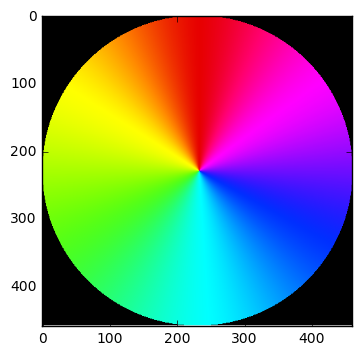

In [2]:
# Load an image
rgb_image_int = Image.open("color_circle.png")
rgb_image_float= np.asarray(rgb_image_int,dtype=float)/255.0 # Convert the image to numpy array
print(rgb_image_float.shape)
rgb_image_float = rgb_image_float[:,:,:3] # Make sure image has three layers
print(rgb_image_float.shape)
plt.imshow(rgb_image_float)
plt.show()

## Convert an RGB image to gray scale
The code below shows how to convert RGB image to gray scale. It also shows how to limit the range of the displayed intensities.

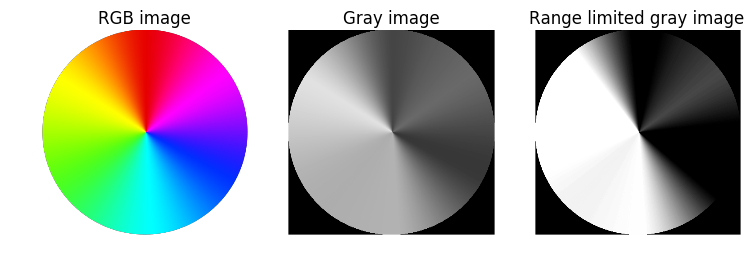

In [3]:
def demo_image_diaply_range(original_image,range=[0.3,.7]):
    rgb_image_float= np.asarray(original_image,dtype=float)/255.0 # Convert the image to numpy array
    gray_image_int=original_image.convert('L')
    gray_image_float= np.asarray(gray_image_int,dtype=float)/255.0 # Normalize the image to be between 0 to 1
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(9,3)
    image_plot = axes_array[0].imshow(rgb_image_float) # Show the RGB image
    axes_array[0].axis('off')
    axes_array[0].set(title='RGB image')
    image_plot = axes_array[1].imshow(gray_image_float,cmap=plt.cm.gray) # Show the gray image
    axes_array[1].axis('off')
    axes_array[1].set(title='Gray image')
    image_plot = axes_array[2].imshow(gray_image_float,cmap=plt.cm.gray,vmin=range[0], vmax=range[1]) # Limit the range
    axes_array[2].axis('off')
    axes_array[2].set(title='Range limited gray image')
    plt.show()
    
rgb_image_int = Image.open("color_circle.png")
interact(demo_image_diaply_range,original_image=fixed(rgb_image_int),
         range=FloatRangeSlider(min=0., max=1., step=0.05,value=[0.3,0.7]),
        continuous_update=False,description='Range');

## Convert an RGB image to HSV and reduce the intensity
The code below shows how to convert RGB image HSV, change the intensity value in the HSV image, convert the HSV back to RGB, and display the result.

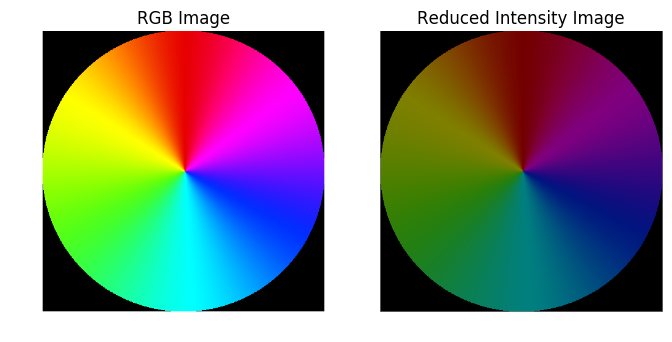

In [4]:
def demo_rgb_to_hsv(original_image,reduce_intensity_factor=0.5):
    original_rgb_image_float= np.asarray(original_image,dtype=float)/255.0 # Convert the image float
    original_rgb_image_float = original_rgb_image_float[:,:,:3] # Make sure image has three layers
    hsv_image=matplotlib.colors.rgb_to_hsv(original_rgb_image_float)
    hsv_image_processed=hsv_image.copy()
    hsv_image_processed[:,: ,2]=hsv_image[:,: ,2]*reduce_intensity_factor
    rgb_image_processed=matplotlib.colors.hsv_to_rgb(hsv_image_processed)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(8,4)
    image_plot = axes_array[0].imshow(original_rgb_image_float) # Show the RGB image
    axes_array[0].axis('off')
    axes_array[0].set(title='RGB Image')
    image_plot = axes_array[1].imshow(rgb_image_processed) # Show the gray image
    axes_array[1].axis('off')
    axes_array[1].set(title='Reduced Intensity Image')
    plt.show()

rgb_image_int = Image.open("color_circle.png")
interact(demo_rgb_to_hsv,original_image=fixed(rgb_image_int),
         reduce_intensity_factor=FloatSlider(min=0., max=1., step=0.05,value=0.5,description='Reduce Intensity'));

# Image Filters
* Filtering an image means replacing each pixel in the original image with a linear combination of that pixel and its neighbors.
* The filter “template” or “kernel” or “mask” $H[u,v]$ is the values for the weights in the linear combination.
* Assuming the kernel size is 2k+1 by 2k+1 and the center element is element (0,0):
$$\large g(i,j) = \sum\limits_{u =  - k}^{k} {\sum\limits_{v =  - k}^{k} {h(u,v)f(i +u,j +v)} }   $$

## Convolution 
Convolution is the same as correlation except the mask (also known as **kernel**, or **template**, or **filter**) is flipped both horizontally and vertically. Notice that in convolution you can either flip the mask or flip the original image.

$$\large g(i,j) = \sum\limits_{u =  - k}^{k} {\sum\limits_{v =  - k}^{k} {h(u,v)f(i - u,j - v)} }   $$

**Notes:**
* Convolution between the two function $f$ and $h$ is usually shown as  $g=f*h$  where $*$ means convolution.
* If the kernel is symmetric around the center then correlation and convolution are the same

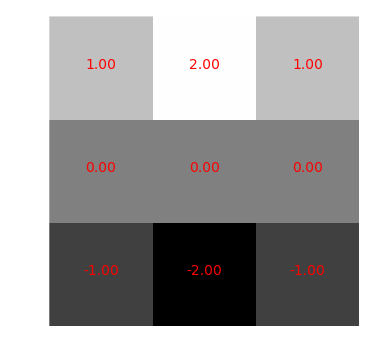

In [5]:
kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])
kernel_sum=np.sum(kernel)
kernel= kernel/kernel_sum if kernel_sum else kernel
plt.rcParams['image.interpolation'] = 'none'
plt.imshow(kernel, cmap=plt.cm.gray);
plt.axis('off')
for row in range(np.shape(kernel)[0]):
    for col in range(np.shape(kernel)[1]):
        plt.text(col,row,'{:0.2f}'.format(kernel[row][col]),ha='center',color='red')
plt.show()

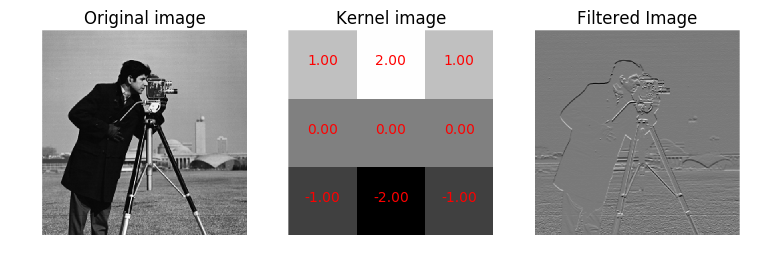

In [6]:
from scipy.ndimage import convolve
plt.rcParams['image.interpolation'] = 'none'
def convolve_two_images_and_display_the_results(kernel,original_image):
    # Normalize the kernel
    kernel_sum=abs(np.sum(kernel))
    kernel= kernel/kernel_sum if kernel_sum else kernel
    filtered_image = scipy.ndimage.convolve(original_image, kernel)
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(9,3)
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
    axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    image_plot = axes_array[1].imshow(kernel,cmap=plt.cm.gray) # Show the kernel
    for row in range(np.shape(kernel)[0]):
        for col in range(np.shape(kernel)[1]):
            axes_array[1].text(col,row,'{:0.2f}'.format(kernel[row][col]),ha='center',color='red')
    axes_array[1].axis('off')
    axes_array[1].set(title='Kernel image')
    image_plot = axes_array[2].imshow(filtered_image,cmap=plt.cm.gray) # Limit the range
    axes_array[2].axis('off')
    axes_array[2].set(title='Filtered Image')
    plt.show()
    
kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])
original_image = data.camera()/255.
convolve_two_images_and_display_the_results(kernel,original_image)


## Image smoothing
If we select a kernel which calculates the average of pixels around the center then this kernel has the effect of smoothing the picture. Note that if we increase the size of the kernel then the image will be smoother.

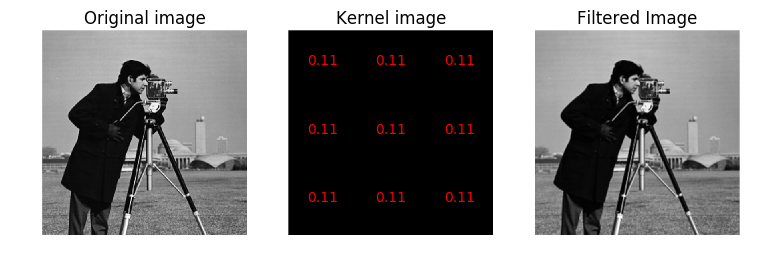

In [7]:
def demo_kernel_size(original_image,kernel_size=3):
    kernel = np.ones((kernel_size,kernel_size))
    convolve_two_images_and_display_the_results(kernel,original_image)
current_image = data.camera()/255.
interact(demo_kernel_size,original_image=fixed(current_image),
         kernel_size=IntSlider(min=1, max=51., step=2,value=3));

As you can see the kernel basically finds the average of all the pixels around the center pixel. What if we like to give higher weights to the pixels which are closer to the center pixel? In that case we can define a function which gets smaller as it gets away from the center. One such function is the Gaussian function. 

$$\large f(x) = \frac{1}{{\sqrt {2\pi{\sigma ^2} } }}\;{e^{ - \frac{{{{(x - \mu )}^2}}}{{2{\sigma ^2}}}}}$$

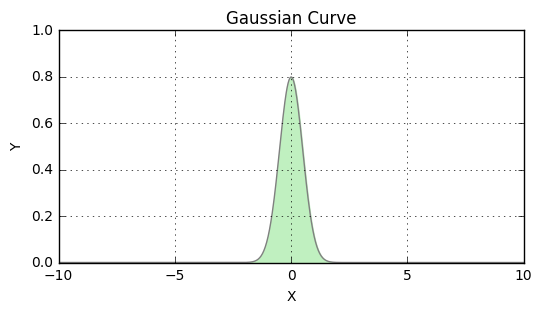

In [8]:
def display_1d_gaussian(mean=0.0,sigma=0.5):
    x=np.linspace(-10,10,1000)
    y= (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-((x-mean)**2)/(2*sigma**2))
    fig, axes1 = plt.subplots(1, 1)
    fig.set_size_inches(6,3)
    axes1.set(xlabel="X",ylabel="Y",title='Gaussian Curve',ylim=(0,1))
    plt.grid(True)
    axes1.plot(x,y,color='gray')
    plt.fill_between(x,y,0,color='#c0f0c0')
    plt.show()
interact(display_1d_gaussian,mean=FloatSlider(min=-10., max=10., step=0.1),
        sigma=FloatSlider(min=0.1, max=10, step=0.1, value=0.5));

Let's create a two dimensional Gaussian kernel.


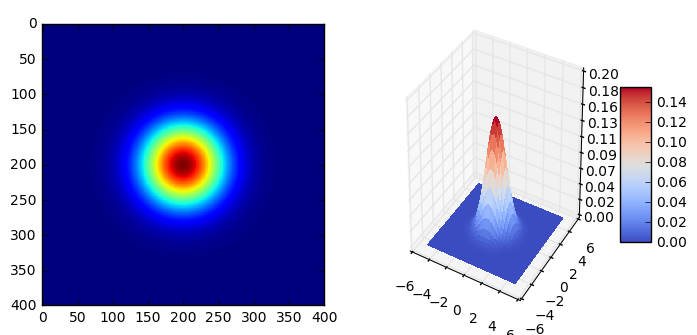

In [9]:
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
def display_gaussian_kernel(sigma=1.0):
    X = np.linspace(-5, 5, 400)
    Y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = np.sin(R)
    mu = np.array([0.0, 0.0])
    covariance = np.diag(np.array([sigma, sigma])**2)
    XY = np.column_stack([X.flat, Y.flat])
    z = scipy.stats.multivariate_normal.pdf(XY, mean=mu, cov=covariance)
    Z = z.reshape(X.shape)

    # Plot the surface.
    fig = plt.figure()
    fig.set_size_inches(8,4)
    ax1 = fig.add_subplot(121)
    ax1.imshow(Z)
    ax2 = fig.add_subplot(122, projection='3d')

    # fig = plt.figure()
    # ax = fig.gca(projection='3d')
    # axes_array[0].set(projection='3d')
    surf = ax2.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                           linewidth=0, antialiased=False)
    # Customize the z axis.
    ax2.set_zlim(0, .2)
    ax2.zaxis.set_major_locator(LinearLocator(10))
    ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
interact(display_gaussian_kernel,sigma=FloatSlider(min=1, max=3, step=0.05,value=1.0,continuous_update=False));

The <tt class="docutils literal"><span class="pre">scipy</span></tt> module has <tt class="docutils literal"><span class="pre">scipy.ndimage.filters.gaussian_filter</span></tt> which will generate the convolution of an image with  a 2d Gaussian filter.

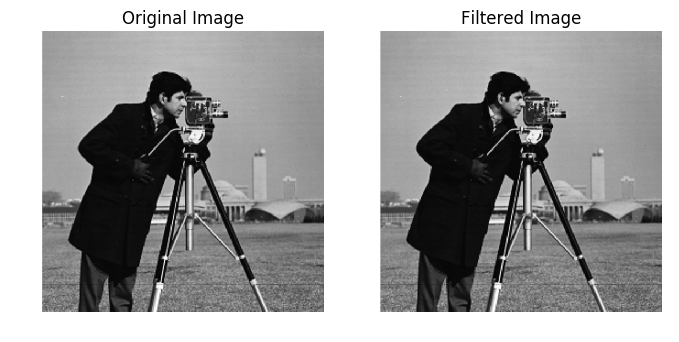

In [10]:
def gaussian_filter_and_display_results(original_image, sigma):
    filtered_image=scipy.ndimage.filters.gaussian_filter(original_image, 
            sigma=sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(8,4)
    image_plot = axes_array[0].imshow(original_image,cmap=plt.cm.gray) 
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Image')
    image_plot = axes_array[1].imshow(filtered_image,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Filtered Image')
    plt.show()

current_image = data.camera()/255.
interact(gaussian_filter_and_display_results,original_image=fixed(current_image),
         sigma=FloatSlider(min=0.0, max=10, step=0.1,continuous_update=False));

You can sharpen an image by subtracting a blurred image from original

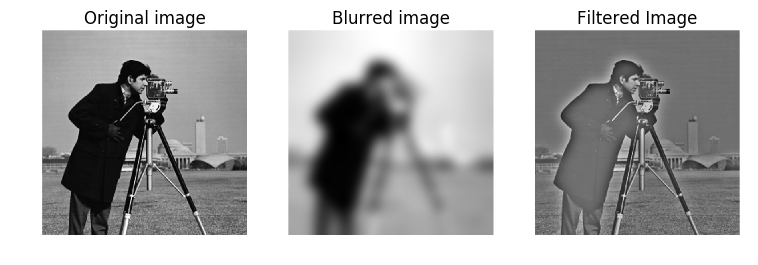

In [11]:
original_image = data.camera()/255.
filtered_image=scipy.ndimage.filters.gaussian_filter(original_image, 
        sigma=15, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
sharpened_image=original_image-filtered_image
fig1, axes_array = plt.subplots(1, 3)
fig1.set_size_inches(9,3)
image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
axes_array[0].axis('off')
axes_array[0].set(title='Original image')
image_plot = axes_array[1].imshow(filtered_image,cmap=plt.cm.gray) # Show the filtered image
axes_array[1].axis('off')
axes_array[1].set(title='Blurred image')
image_plot = axes_array[2].imshow(sharpened_image,cmap=plt.cm.gray) # Show the sharpened image
axes_array[2].axis('off')
axes_array[2].set(title='Filtered Image')
plt.show()

## Removing noise by median filtering
Median filtering is a non-linear operation. The idea is to slide an N by M window over the original image and replace the value of each pixel in the image with the median value of the neighborhood pixels.Median filtering operations are typically used for removing outliers and salt-and-pepper noise.

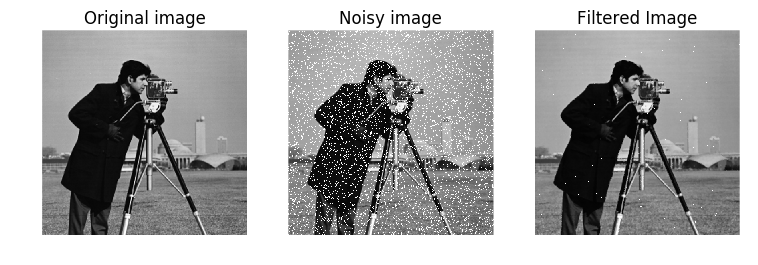

In [12]:

def median_filter_demo(original_image,filter_size=5,noise_percent=10):
    noise=np.random.rand(*original_image.shape)
    noisy_image=original_image.copy()
    noisy_image[noise>(1-noise_percent*.01)]=1.0
    median_filtered_image=scipy.ndimage.filters.median_filter(noisy_image, 
                    size=filter_size, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(9,3)
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
    axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    image_plot = axes_array[1].imshow(noisy_image,cmap=plt.cm.gray) # Show the filtered image
    axes_array[1].axis('off')
    axes_array[1].set(title='Noisy image')
    image_plot = axes_array[2].imshow(median_filtered_image,cmap=plt.cm.gray) # Show the sharpened image
    axes_array[2].axis('off')
    axes_array[2].set(title='Filtered Image')
    plt.show()
    return
current_image = data.camera()/255.
# current_image=current_image[200:220,200:220]
interact(median_filter_demo,original_image=fixed(current_image),
         filter_size=IntSlider(min=3, max=15, step=2,continuous_update=False,description='Filter Size'),
         noise_percent=IntSlider(min=0, max=100, step=1,value=10,continuous_update=False,description='Noise %'));

## Binarization
Image binarization converts an image to an image with only two levels (usually 0 and 1 or black and white).
The Simplest way to binarize an image is to choose a threshold and replace the value of all the pixels whose values are above threshold with 1 and replace the value of all the pixels below the threshold with zero.

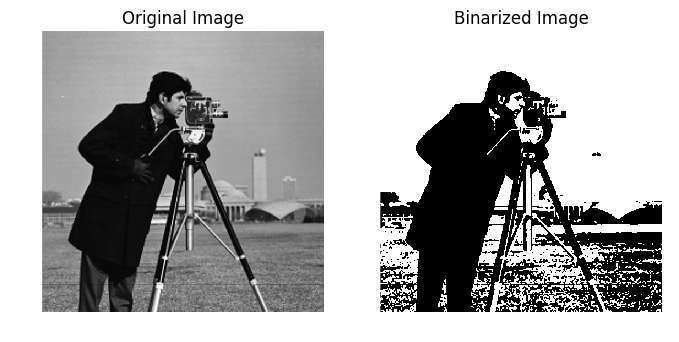

In [13]:

def binarize_image_and_display_results(input_image, threshold):
#     print("Threshold=",threshold)
    binarized_image=np.zeros(input_image.shape)
    binarized_image[input_image>=threshold]=1.0
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(8,4)
    image_plot = axes_array[0].imshow(input_image,cmap=plt.cm.gray) 
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Image')
    image_plot = axes_array[1].imshow(binarized_image,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Binarized Image')
    plt.show()
original_image = data.camera()/255.
interact(binarize_image_and_display_results,input_image=fixed(original_image),
         threshold=FloatSlider(min=0.1, max=1.0, step=0.05,value=.5,continuous_update=False,description='Threshold'));

## Morphology

Morphological operations are mathematical concepts from the set theory. The morphological operations are specially useful for edge detection, noise removal, image enhancement and image segmentation. These operations are normally performed on binary images and they need two inputs, the original image, and a structuring element or kernel which determines the nature of operation. 
The kernel is positioned at all possible locations in the image and it is compared with the corresponding pixels. Two basic morphological operators are Erosion and Dilation. 
* **Erosion:** The mathematical definition of erosion for binary images is:

    - Suppose that X is the set of coordinates corresponding to the input binary image, and that K is the set of coordinates for the structuring element.

    - Let Kx denote the translation of K so that its origin is at x.

    - Then the erosion of X by K is simply the set of all points x such that Kx is a subset of X. 
    
    In simple terms, the value of the output pixel is set to the **minimum** value of all the pixels under the kernel (mask). In other words, slide the mask over the original image. At any position consider all the pixels under the mask (where the value of the mask is 1). take the minimum value of all the pixel and replace the pixel under the center of the mask with the minimum value. For binary images if any pixel under the mask is 0, then the output pixel is set to zero.
* **Dilation:** The value of the output pixel is set to the **maximum** value of all the pixels under the kernel (mask).

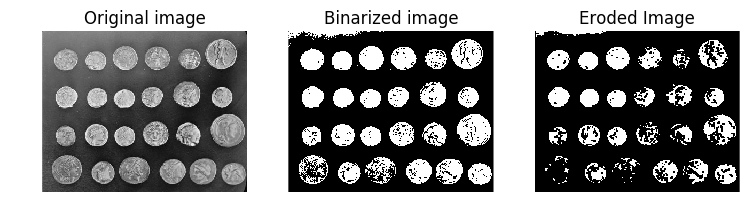

In [14]:
from skimage import data
def erosion_demo(binarized_image,kernel_size):
    eroded_image=scipy.ndimage.morphology.binary_erosion(binarized_image, 
                    structure=np.ones((kernel_size,kernel_size)), iterations=1, mask=None,
                    border_value=0, origin=0, brute_force=False)
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(9,3)
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
    axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    image_plot = axes_array[1].imshow(binarized_image,cmap=plt.cm.gray) 
    axes_array[1].axis('off')
    axes_array[1].set(title='Binarized image')
    image_plot = axes_array[2].imshow(eroded_image,cmap=plt.cm.gray) 
    axes_array[2].axis('off')
    axes_array[2].set(title='Eroded Image')
    plt.show()
original_image=np.asarray(data.coins())/255.
current_binarized_image=np.where(original_image>0.5,1.,0.)


interact(erosion_demo,binarized_image=fixed(current_binarized_image),
         kernel_size=IntSlider(min=3, max=15, step=2,value=3,
            description='Kernel Size:',slider_color='red',continuous_update=False));

The reverse of **erosion** is **dilation** 

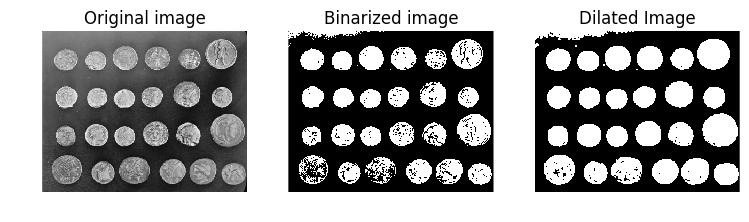

In [15]:
from skimage import data
def dilation_demo(binarized_image,kernel_size):
    eroded_image=scipy.ndimage.morphology.binary_dilation(binarized_image, 
                    structure=np.ones((kernel_size,kernel_size)), iterations=1, mask=None,
                    border_value=0, origin=0, brute_force=False)
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(9,3)
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
    axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    image_plot = axes_array[1].imshow(binarized_image,cmap=plt.cm.gray) 
    axes_array[1].axis('off')
    axes_array[1].set(title='Binarized image')
    image_plot = axes_array[2].imshow(eroded_image,cmap=plt.cm.gray) 
    axes_array[2].axis('off')
    axes_array[2].set(title='Dilated Image')
    plt.show()
original_image=np.asarray(data.coins())/255.
current_binarized_image=np.where(original_image>0.5,1.,0.)


interact(dilation_demo,binarized_image=fixed(current_binarized_image),
         kernel_size=IntSlider(min=3, max=15, step=2,value=3,
            description='Kernel Size:',slider_color='red',continuous_update=False));

There are other morphological operators including:

* **Closing:** The closing of an input image is the erosion of the dilation of the image by the structuring element.
* **Opening:** The opening of an input image is the dilation  of the erosion of the image by the structuring element.

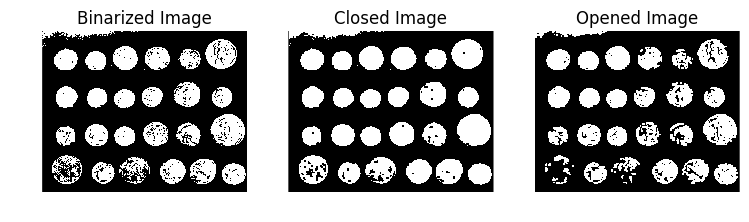

In [16]:
from skimage import data
def close_and_open_demo(binarized_image,kernel_size):
    closed_image=scipy.ndimage.morphology.binary_closing(current_binarized_image, 
             structure=np.ones((kernel_size,kernel_size)), iterations=1, output=None, origin=0)
    opened_image=scipy.ndimage.morphology.binary_opening(current_binarized_image, 
                 structure=np.ones((kernel_size,kernel_size)), iterations=1, output=None, origin=0)
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(9,3)
    image_plot = axes_array[0].imshow(current_binarized_image ,cmap=plt.cm.gray) 
    axes_array[0].axis('off')
    axes_array[0].set(title='Binarized Image')
    image_plot = axes_array[1].imshow(closed_image,cmap=plt.cm.gray) 
    axes_array[1].axis('off')
    axes_array[1].set(title='Closed Image')
    image_plot = axes_array[2].imshow(opened_image,cmap=plt.cm.gray) 
    axes_array[2].axis('off')
    axes_array[2].set(title='Opened Image')
    plt.show()

original_image=np.asarray(data.coins())/255.
current_binarized_image=np.where(original_image>0.5,1.,0.)
interact(close_and_open_demo,binarized_image=fixed(current_binarized_image),
         kernel_size=IntSlider(min=3, max=15, step=2,value=3,
            description='Kernel Size:',slider_color='red',continuous_update=False));

## Geometrical Transformations
Images can be flipped, rotated, resized, and cropped

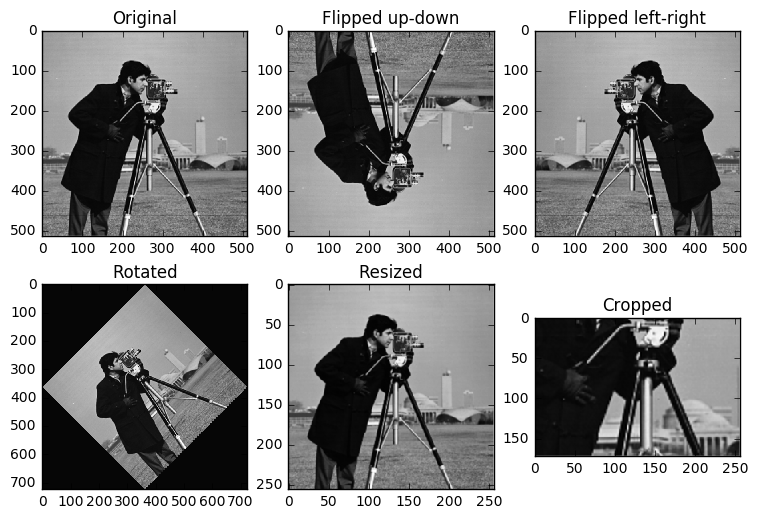

In [17]:
original_image = data.camera()/255.
flipud_image=np.flipud(original_image)
fliplr_image=np.fliplr(original_image)
rotated_image=scipy.ndimage.rotate(original_image,45)
resized_image=scipy.misc.imresize(original_image, 0.5, interp='bilinear', mode=None)
rows,cols=original_image.shape
croped_image = original_image[int(rows / 3): -int(rows / 3), int(cols / 4): - int(cols / 4)]
fig1, axes_array = plt.subplots(2, 3)
fig1.set_size_inches(9,6)
image_plot = axes_array[0][0].imshow(original_image ,cmap=plt.cm.gray) 
axes_array[0][0].set(title='Original')
image_plot = axes_array[0][1].imshow(flipud_image,cmap=plt.cm.gray) 
axes_array[0][1].set(title='Flipped up-down')
image_plot = axes_array[0][2].imshow(fliplr_image,cmap=plt.cm.gray) 
axes_array[0][2].set(title='Flipped left-right')
image_plot = axes_array[1][0].imshow(rotated_image,cmap=plt.cm.gray) 
axes_array[1][0].set(title='Rotated')
image_plot = axes_array[1][1].imshow(resized_image,cmap=plt.cm.gray) 
axes_array[1][1].set(title='Resized')
image_plot = axes_array[1][2].imshow(croped_image,cmap=plt.cm.gray) 
axes_array[1][2].set(title='Cropped')
plt.show()
